# Pytorch Work Flow
lets exploe a an example pytorch and end to end workflow 
resources :
book version : https://www.learnpytorch.io/01_pytorch_workflow/

github : https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

ask a question : https://github.com/mrdbourke/pytorch-deep-learning/discussions

## what are  we covering 
1. data (prepare and load)
2. build model 
3. fitting the model to data (training)
4. making the prediction and evaluting a model (inference)
5. saving and loading model
6. putting it all together

In [95]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

torch.__version__

'1.13.1+cu116'

##Data preparing and loading
data can be almost anything  ... in machine learning

* excel spreadsheet
* images of any kind 
* videos, audio
* DNA and so on .....

ML is game of two parts
1. get data into a numerical representation
2. build a model to learn patterns in that numercial representation

to show case this, Lets create some **known** data using linear regression formula.**`(Y = a + bX)`**

we use LR formula to make a straight line with known **parameters**.



In [96]:
from six import b
#create known parameters

weight = 0.7
bias = 0.3

#create 
start = 0
end = 1 
step = 0.02
X =torch.arange(start,end,step).unsqueeze(dim =1)
Y = weight * X + bias
X[:10] , Y[:10] 

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [97]:
len(X) ,len(Y)

(50, 50)

### 1. splitting data into training and test sets (one of the most important concepts in ML)

1. training set (ex: course material)
2. validation set (ex : practice exam)
3. test set (ex : final exam)

* Training set	The model learns from this data (like the course materials you study during the semester).	~60-80%	Always
* Validation set	The model gets tuned on this data (like the practice exam you take before the final exam).	~10-20%	Often but not always
* Testing set	The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).	~10-20%	Always

In [98]:
# 1.create a train/test split
train_split = int(0.8 * len(X))
X_train , Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]

len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

How might we better visualize our data?
This is where the data explorers motto comes in!
"visualize,visualize,visualize!"

In [99]:
def plot_predictions(train_data = X_train,
                     train_label = Y_train,
                     test_data = X_test,
                     test_label = Y_test,
                     prediction = None):
  """
  Plots training data, test data and compares predictions.
  """ 
  plt.figure(figsize = (10,7))

  #plot training data in blue
  plt.scatter(train_data, train_label,c = "b", s= 4 , label = "Training Data")

  #plot testing data in green
  plt.scatter(test_data,test_label,c = "g", s= 4 , label = "Testing Data")

  #are there predictions?
  if prediction is not None:
    plt.scatter(test_data,prediction,c ="r",s=4 , label = "predictions")

  #show the legends
  plt.legend(prop ={"size": 14});


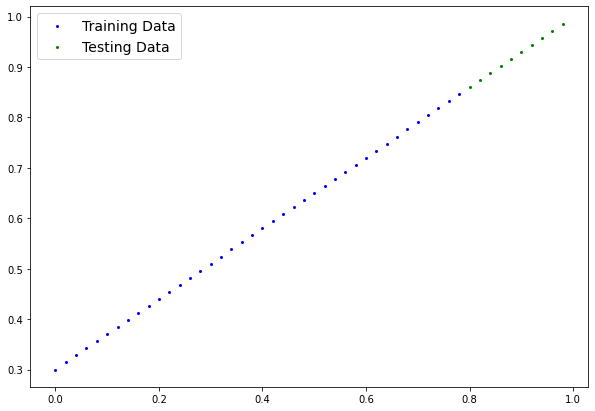

In [100]:
plot_predictions();

## 2. Build model
our first pytorch model!

this is very exciting....lets do it

because we're going to be building classes throught the course, I'd recommend getting fimilar with python OOPs concept.

what our model does:
1. start with random values 
2. look at the training data and adjust the random value to better represent (or get closer to) the ideal values (the weight and bais  values we used to create the data)

How does it do so?
through two main Algorithms:
1. Gradient descent : https://youtu.be/IHZwWFHWa-w
2. Backproagation :https://youtu.be/Ilg3gGewQ5U

In [101]:
from torch import nn
#create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,dtype = torch.float),
                                            requires_grad= True
                                            )
    self.bias = nn.Parameter(torch.rand(1, dtype=torch.float),
                                        requires_grad=True,
                                       )
  def forward(self,x: torch.Tensor) ->torch.Tensor : # "x" ix the input data
    return (self.weight *x + self.bias) #this is the linear regression formula


### pytorch model building essentials
* torch.nn - contains all of the buildings for computational graphs.
* torch.nn.Parameter - what parameters should our model try and learn , often a pytorch layer from torch.nn layer will set this 
* torch.nn.Module - the base class for all neural network modules, If you subclass it, you should overwrite the forward().

* torch.optim - this where the optimizers in pytorch live, they will help with gradient descent.

* def forwatd() - All nn.Modules subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

See more in the pytorch cheat sheet :https://www.learnpytorch.io/pytorch_cheatsheet/

### checking the contents of our pytorch model 

Now we've created a model, let's see what's inside... 

so we can check our model parameters or what's inside our model using `.parameters()`


In [102]:
# create a random seed 
torch.manual_seed(42)

#create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [103]:
# List named Parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [104]:
weight , bias
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

### Making Prediction using `torch.inference_mode()`

to check our model's predictive power, let's see how well it predicts `Y_test` based on `X_test`.

when we pass our data through our model, its going to run it through the forward method. 



In [105]:
#Make prediction with model (IM disables all keeping track of gradients)
with torch.inference_mode():
  y_pred = model_0( X_test )

#you can also do something similar with torch.no_grad()
# with torch.no_grad():
#   y_pred = model_0(X_test)
y_pred

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

see more on Infernece mode here  : https://twitter.com/PyTorch/status/1437838231505096708

In [106]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

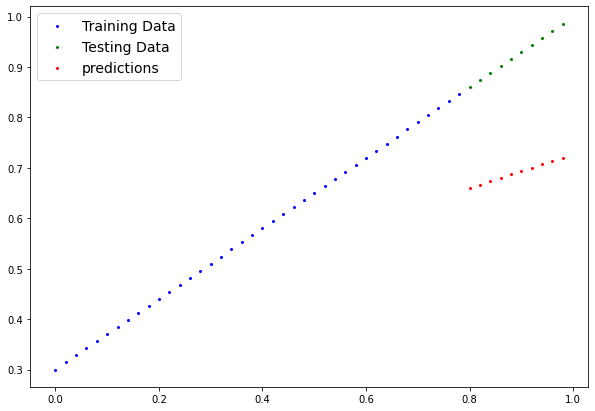

In [107]:
plot_predictions(prediction = y_pred)

## 3. train model 
the whole idea of training is for a model to move from some *unkown* parameters (these may be random) to some *known* parameters.

or in other words from a poor representation of the data to a better representation of the data.

one way to measure how poor or how wrong your model predictions are by using loss functions.

* Note : loss function may also be called cost function or criterion in differnet areas. for our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs.

* **Optimizer:** Takes into account the loss of a model's and adjusts the model's parameters(e.g. weight and bias) to improve the loss function.
  * inside the optimizer you'll often have to set two parameters:
    * Paramas - the model parameters you'd like to optimize.
    * lr - thus us hyperparameter that defines how big/small the optimizer changes the parameters with each step.
(small the lr small the change in results and vice versa)

resources :
https://pytorch.org/docs/stable/nn.html#loss-functions
https://pytorch.org/docs/stable/optim.html

And specifically for pytorch, we need:
* A training loop
* A testing loop

In [108]:
# a parameter is a value that the model sets itself
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [109]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [110]:
 #setup  a Loss Function
loss_fn = nn.L1Loss()

 #Setup an Optimizer  (Stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)#lr= learning rate  = possibly the most important hyperparameter you can set.

**Q**: which loss function and optimizer should i use?
**A** : This will be problem specific.  but with experience, you'll get an idea of works and what doesn't with your particular problem set.

For example, for a regression problem(like ours),a loss function of `nn.L1Loss()` and an optimiz like `torch.optim.SGD()` will suffice.

but for a classification problem like classifying wheter a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss(()`.


### Building a training loop (and a testing loop) in pytorch

a couple of things we need in a training loop:
0. Loop through the data.
1. Forward pass/propagation (this involves data moving through our models. `forward function` to make predictions on data - also called forward propagation.
2. caluculate the loss.(compared forward pass prediction to the ground truth labels).
3. optimizer zero grad.
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss.(**back propagation**)
Backproagation : https://youtu.be/Ilg3gGewQ5U

5. optimizer step - use the optimizer to adjust our models parameter to try and improve the loss.(**gradient descent**)
 Gradient descent : https://youtu.be/IHZwWFHWa-w


In [111]:
# an epoch is one loop through the data.. (hyperparameter we set it ourselves)
epochs =200

#track different values
epoch_count = []
loss_values =[]
test_loss_values =[]

## training
# 0 loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() #train mode in pytorch all parameters that requie gradients to require gradients 
  
  #1. forward pass
  y_preds = model_0(X_train)
  
  #2. calculate loss
  loss = loss_fn(y_preds,X_train)
  #print(f"LOSS : {loss}")
  #3. optimizerzero grad()
  optimizer.zero_grad()

  #4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. step optimizer(perform the gradient descent)
  optimizer.step()#by default how the optimizer changes will accumlate through the loop so .. we have to zero them above in step 3 for next iteration of the loop.


  ##testing 
  model_0.eval() #turns off different settings in the model not needed for evaluation/testing(dropout/batchnorm)
  with torch.inference_mode(): # you may also see torch.no_grad()in older pytorch code
      #1. do  the forward pass 
      test_pred = model_0(X_test)
      test_loss = loss_fn(test_pred,Y_test)
      if epoch %10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"epoch:{epoch} | Loss: {loss} | test loss:{test_loss}")    

model_0.state_dict()

epoch:0 | Loss: 0.16537517309188843 | test loss:0.23829784989356995
epoch:10 | Loss: 0.14782437682151794 | test loss:0.2780146598815918
epoch:20 | Loss: 0.1389281153678894 | test loss:0.2993486523628235
epoch:30 | Loss: 0.1331891268491745 | test loss:0.31062984466552734
epoch:40 | Loss: 0.12897032499313354 | test loss:0.3134368658065796
epoch:50 | Loss: 0.12515176832675934 | test loss:0.3120688498020172
epoch:60 | Loss: 0.12162365764379501 | test loss:0.30791765451431274
epoch:70 | Loss: 0.11809555441141129 | test loss:0.3037664294242859
epoch:80 | Loss: 0.11456742137670517 | test loss:0.2996153235435486
epoch:90 | Loss: 0.11111921072006226 | test loss:0.2920297384262085
epoch:100 | Loss: 0.10768040269613266 | test loss:0.2837572395801544
epoch:110 | Loss: 0.10424886643886566 | test loss:0.2761716842651367
epoch:120 | Loss: 0.10081559419631958 | test loss:0.26789921522140503
epoch:130 | Loss: 0.09737677872180939 | test loss:0.25962671637535095
epoch:140 | Loss: 0.0939469188451767 | tes

OrderedDict([('weight', tensor([0.6352])), ('bias', tensor([0.1534]))])

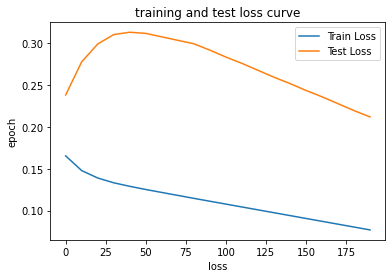

In [112]:
import numpy as np

#plot loss curves 
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()) ,label="Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()),label="Test Loss")

plt.title("training and test loss curve")
plt.xlabel("loss")
plt.ylabel("epoch")
plt.legend();

In [113]:
model_0.state_dict()


OrderedDict([('weight', tensor([0.6352])), ('bias', tensor([0.1534]))])

In [114]:
weight,bias

(0.7, 0.3)

In [115]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

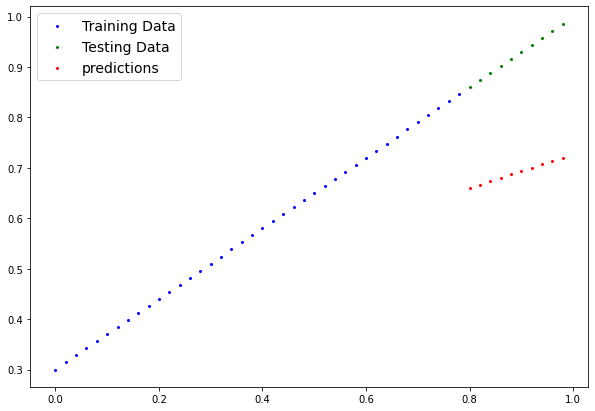

In [116]:
plot_predictions(prediction=y_pred)

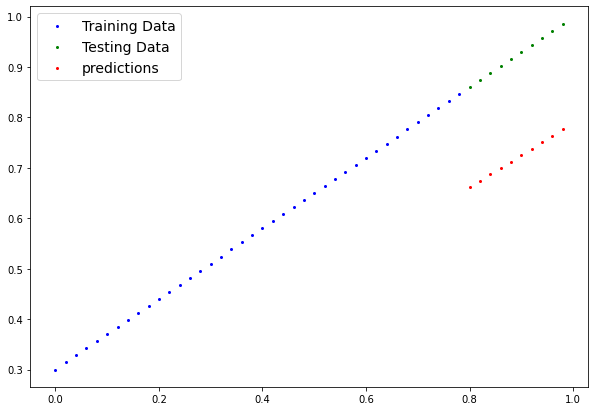

In [117]:
plot_predictions(prediction= y_pred_new)

## Saving a model in pytorch

There are three main methods you should know about for saving and loading models in pytorch

1. `torch.save()` -allows you save a pytorch object in pyton's pickle format

2. `torch.load()` - allows you load a saved pytorch object

3. `torch.nn.Module.load_state_dict()` - this allows to load a models saved state dictionary.

resources : https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [118]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


## Lets Put all together:

### 1. Data

In [119]:
from matplotlib.offsetbox import bbox_artist
#create some data using the LR formula y = weight*x + b
weight = 0.7
bias = 0.3

#create range value
start =0
end = 1
step = 0.02

#create X and y(feature and labels)

X = torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [120]:
train_split = int(0.8 *len(X))
X_train ,y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

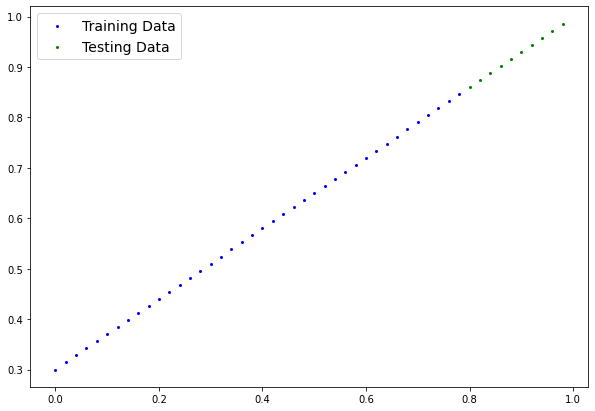

In [121]:
plot_predictions(X_train,y_train,X_test,y_test)

### Building a pytorch model

In [122]:
from torch.nn.modules.linear import Linear
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.linear() for creating model parameters 
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x: torch.tensor) -> torch.tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [123]:
next(model_1.parameters()).device

device(type='cpu')

In [124]:
# Set the model to use the target device 
model_1.to(torch.device("cuda:0"))
next(model_1.parameters()).device


device(type='cuda', index=0)

In [125]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

### training :

In [126]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters() ,lr=0.01)


In [127]:
from torch.optim.optimizer import Optimizer
torch.manual_seed(42)

epoch_count = []
loss_values =[]
test_loss_values =[]
 
epochs = 200
#put data on GPU data agnostic code 
X_train = X_train.to(device="cuda:0")
y_train = y_train.to(device="cuda:0")
X_test = X_test.to(device="cuda:0")
y_test = y_test.to(device="cuda:0")


for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss= loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch %10 == 0 :
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"epoch:{epoch} | Loss : {loss} | Test loss: {test_loss}")

epoch:0 | Loss : 0.5551779866218567 | Test loss: 0.5739762187004089
epoch:10 | Loss : 0.439968079328537 | Test loss: 0.4392664134502411
epoch:20 | Loss : 0.3247582018375397 | Test loss: 0.30455657839775085
epoch:30 | Loss : 0.20954833924770355 | Test loss: 0.16984669864177704
epoch:40 | Loss : 0.09433845430612564 | Test loss: 0.03513690456748009
epoch:50 | Loss : 0.023886388167738914 | Test loss: 0.04784907028079033
epoch:60 | Loss : 0.019956795498728752 | Test loss: 0.045803118497133255
epoch:70 | Loss : 0.016517987474799156 | Test loss: 0.037530567497015
epoch:80 | Loss : 0.013089174404740334 | Test loss: 0.02994490973651409
epoch:90 | Loss : 0.009653178043663502 | Test loss: 0.02167237363755703
epoch:100 | Loss : 0.006215683650225401 | Test loss: 0.014086711220443249
epoch:110 | Loss : 0.00278724217787385 | Test loss: 0.005814164876937866
epoch:120 | Loss : 0.0012645035749301314 | Test loss: 0.013801801018416882
epoch:130 | Loss : 0.0012645035749301314 | Test loss: 0.013801801018416

In [128]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [129]:
weight, bias

(0.7, 0.3)

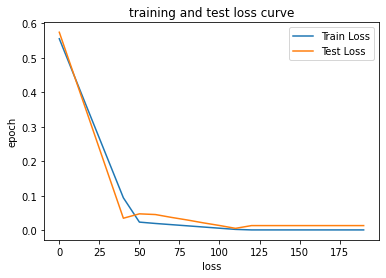

In [130]:
import numpy as np

#plot loss curves 
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()) ,label="Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()),label="Test Loss")

plt.title("training and test loss curve")
plt.xlabel("loss")
plt.ylabel("epoch")
plt.legend();

In [131]:
model_1.eval()
with torch.inference_mode():
  y_pred_new = model_1(X_test)

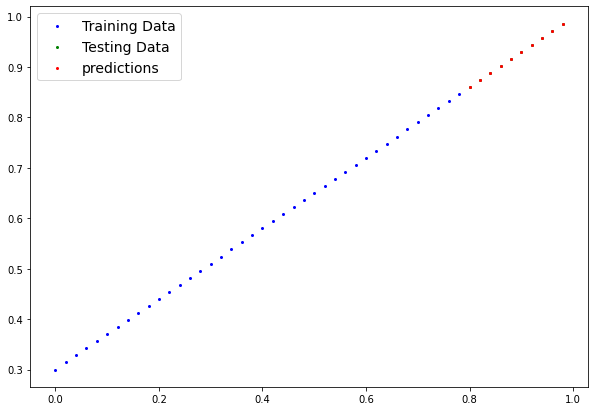

In [132]:
plot_predictions(prediction= y_pred_new.cpu())

### Saving and loading pytorch model

In [133]:
from pathlib import Path

MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)

MODEL_NAME ="01-pytorch_workflow_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models/01-pytorch_workflow_1.pth


In [134]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [139]:
#load a model 
loaded_model_1 =LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(torch.device("cuda:0"))

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [140]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [142]:
#evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_pred_new == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## For Exercises and Extra ciruculum 
https://www.learnpytorch.io/01_pytorch_workflow/#exercises

https://www.learnpytorch.io/01_pytorch_workflow/#extra-curriculum